In [ ]:
!pip install -q findpeaks

     |████████████████████████████████| 44 kB 1.6 MB/s 


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import tifffile as tif
import matplotlib.pyplot as plt
from findpeaks import findpeaks
import findpeaks
import numpy as np

In [ ]:
# Lendo arquivo
img = tif.imread('ALOS_VH.tif')

In [ ]:
# Função para converter de linear para decibel
def linear_to_decibel(band):
    return 10*np.log10(band)

In [ ]:
# Conversão para decibel
img2 = linear_to_decibel(img)

In [ ]:
# Parâmetros pré-definidos
window = 15 # Tamanho da janela

damping_factor_frost = 2.0 # Damping factor Frost

damping_factor_lee = 1.0 # Damping factor Lee enhanced

cu_val = 0.25 # Coeficiente de variação do ruído

cu_lee_enhanced = 0.523 # Coeficiente de variação do ruído para o Lee enhanced

cmax_val = 1.73 # Coeficiente de variação máxima para o Lee enhanced

In [ ]:
# Rescalonando imagem 
img2 = findpeaks.stats.scale(img2)

# Frost
image_frost = findpeaks.frost_filter(img2, damping_factor=damping_factor_frost,
                                     win_size=window)
# Kuan
image_kuan = findpeaks.kuan_filter(img2, win_size=window, cu=cu_val)

# Lee
image_lee = findpeaks.lee_filter(img2, win_size=window, cu=cu_val)

# Lee enhanced
image_lee_enhanced = findpeaks.lee_enhanced_filter(img2, win_size=window, 
                                                   k=damping_factor_lee, 
                                                   cu=cu_lee_enhanced, 
                                                   cmax=cmax_val)

Text(0.5, 1.0, 'Lee Enhanced')

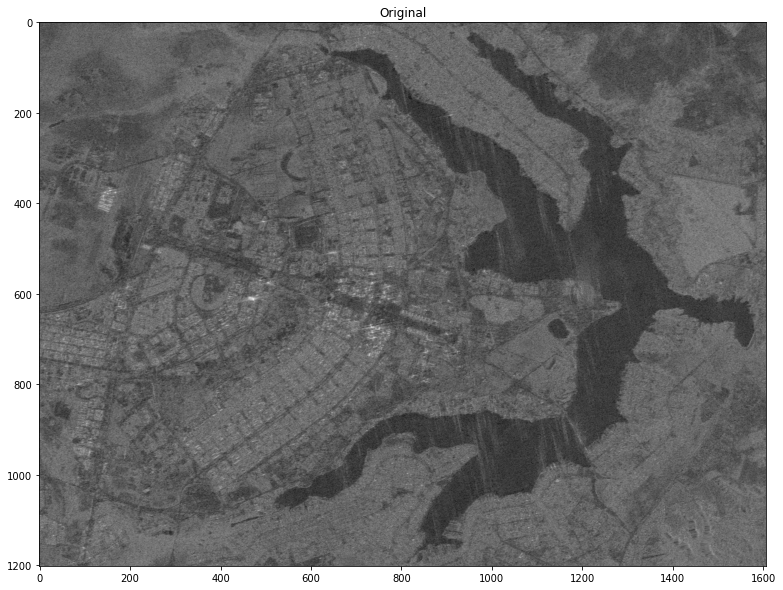

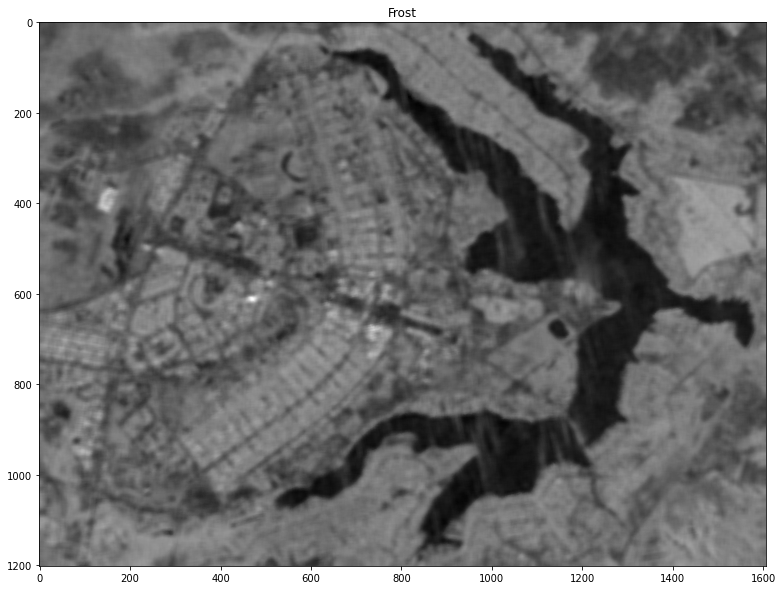

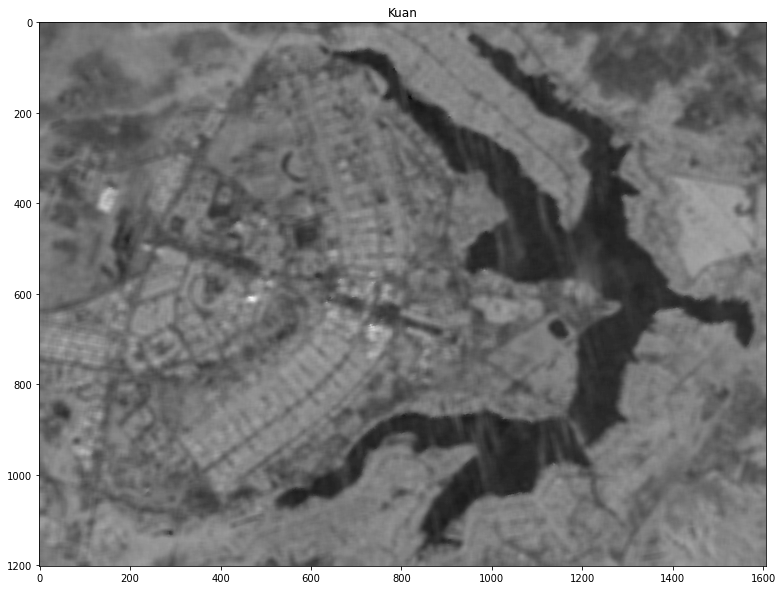

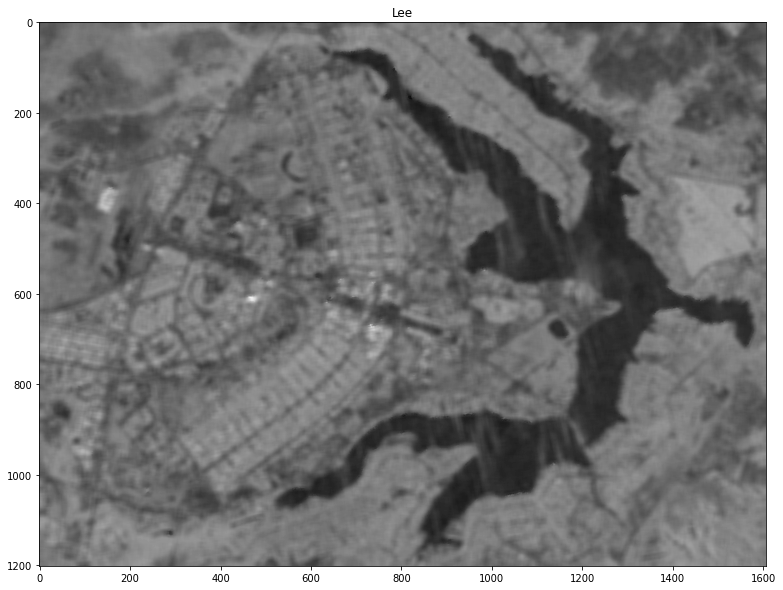

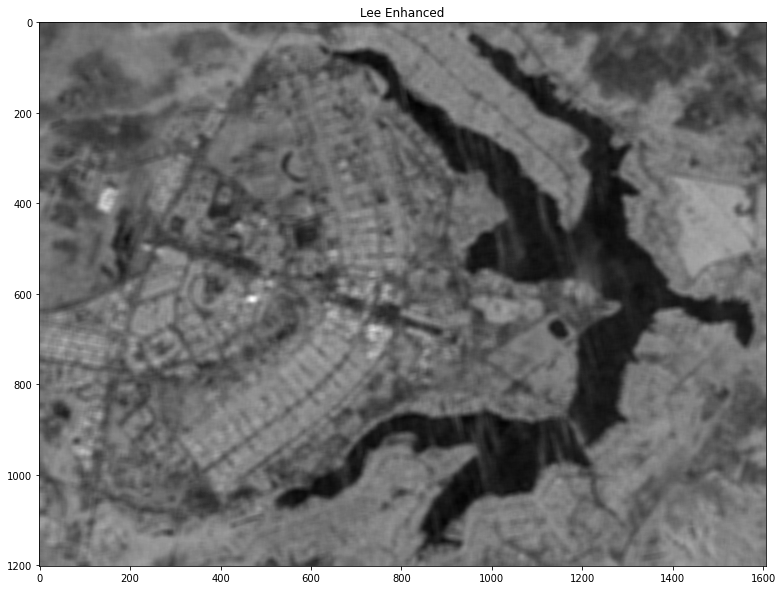

In [ ]:
# Visualizando resultados
plt.figure(); plt.imshow(img2, cmap='gray'); plt.title('Original')
plt.figure(); plt.imshow(image_frost, cmap='gray'); plt.title('Frost')
plt.figure(); plt.imshow(image_kuan, cmap='gray'); plt.title('Kuan')
plt.figure(); plt.imshow(image_lee, cmap='gray'); plt.title('Lee')
plt.figure(); plt.imshow(image_lee_enhanced, cmap='gray'); plt.title('Lee Enhanced')